# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [13]:
from scipy import stats 
import numpy as np

GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9]) 
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [8]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

# Solution:

# #Step 1: Define Null and Alternate Hypotheses

* Null Hypothesis is that µGPU1 is equal to zero
* Alternate Hypothesis is that µGPU1 is not equal to zero

# #Step 2: Decide the significance level

* We select significance level α = 0.05 and sample size n = 15

# #Step 3: Identify the test statistic

* We do not know the population standard deviation and the sample is not a large sample, n < 30. 

* So we use the t distribution and the  𝑡𝑆𝑇𝐴𝑇  test statistic.

# #Step 4: Calculate p-value and test statistic

In [14]:
muGPU1_NULL = 0
t_stat, p_value = ttest_1samp(GPU1, muGPU1_NULL)
print(t_stat, p_value)

34.056241516158195 7.228892044970457e-15


# #Step 5: Decide to reject or accept the Null Hypothesis

* In this case, p value is 7.228892044970457e-15 and it is very less than 5% level of significance

* So the statistical decision is to reject the null hypothesis at 5% level of significance.

## So we have enough evidence to say that mean of GPU1 is not equal to 0.

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Solution:

# #Step 1: Define Null and Alternate Hypotheses

* The null hypothesis states that the data set of GPU1 is not significantly different from GPU2 . The alternative hypthesis states that the data set of GPU1 is significantly different from GPU2,  𝜇GPU1  ≠   𝜇GPU2 

* 𝐻0 :  𝜇GPU1  -  𝜇GPU2  = 0

* 𝐻𝐴 :  𝜇GPU1  -  𝜇GPU2   ≠  0

# #Step 2: Decide the significance level

* We select significance level α = 0.05 and sample size n = 15(< 30) and population standard deviation is not known

# #Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are same.
* The sample is not a large sample, n < 30. So we use the t distribution and the $t_STAT$ test statistic for this two sample unpaired test.

# #Step 4: Calculate p-value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

In [15]:
t_stat, p_value = stats.ttest_ind(GPU1, GPU2)
print(p_value)

0.013794282041452725


# #Step 5: Decide to reject or accept the Null Hypothesis

* In this case, p value is 0.013794282041452725 and it less than 5% level of significance

* So the statistical decision is to reject the null hypothesis at 5% level of significance.

## So we have enough evidence to say that data set of GPU1 is significantly different from GPU2.

## Question 3

He is trying a third GPU - GPU3.

In [16]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

# #Step 1: Define Null and Alternate Hypotheses

* The null hypothesis states that the speeds of GPU1 is not significantly different from GPU3 . The alternative hypthesis states that the speeds of GPU1 is significantly different from GPU3,  𝜇GPU1  ≠   𝜇GPU3 

* 𝐻0 :  𝜇GPU1  -  𝜇GPU3  = 0

* 𝐻𝐴 :  𝜇GPU1  -  𝜇GPU3   ≠  0

# #Step 2: Decide the significance level

* We select significance level α = 0.05 and sample size n = 15(< 30) and population standard deviation is not known

# #Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are same.
* The sample is not a large sample, n < 30. So we use the t distribution and the $t_STAT$ test statistic for this two sample unpaired test.

# #Step 4: Calculate p-value and test statistic

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.**

In [17]:
t_stat, p_value = stats.ttest_ind(GPU1, GPU3)
print(p_value)

0.14509210993138993


# #Step 5: Decide to reject or accept the Null Hypothesis

* In this case, p value is 0.14509210993138993 and it very much higher than 5% level of significance

* So the statistical decision is to accept the null hypothesis at 5% level of significance.

## So we do not have enough evidence to reject Null hypothesis that speeds of GPU1 is not significantly different from GPU3.

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [18]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

Before we conduct ANOVA test on the given samples, we check whether all the samples are from populations with equal variances. This can be done using Levene's test.

In [20]:
stats.levene(e1, e2, e3)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

As we can see from the above result, p > 0.05 and thus our assumption of variance criterion holds true. Now we can go ahead and conduct ANOVA test. 

In [24]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

exp_df = pd.DataFrame()

df1 = pd.DataFrame({'exp': '1', 'result':e1})
df2 = pd.DataFrame({'exp': '2', 'result':e2})
df3 = pd.DataFrame({'exp': '3', 'result':e3})

exp_df = exp_df.append(df1) 
exp_df = exp_df.append(df2) 
exp_df = exp_df.append(df3)

exp_df.head()

,exp,result
0,1,1.59544
1,1,1.41973
2,1,0.00000
3,1,0.00000
0,2,1.43380


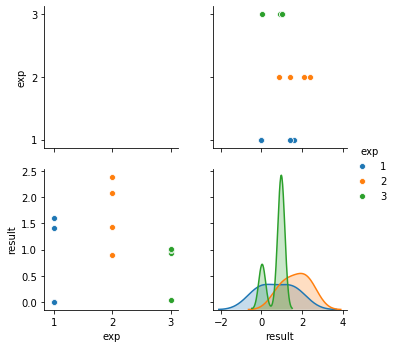

In [26]:
sns.pairplot(exp_df,diag_kind='kde',hue='exp')

### Step 1: State the null and alternative hypothesis:

* $Null Hypothesis$: $\mu1$ = $\mu2$ = $\mu3$
* $Alternate Hypothesis$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p using ANOVA table

In [30]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('result ~ exp', data = exp_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
exp       2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.135746 and it is greater than our chosen level of signifance at 5%

So the statistical decision is to accept the null hypothesis at 5% level of significance.

### So there is  not enough evidence  to reject the null hypothesis that at least one experiment mean is different from others .

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [34]:
# This is another way of conducting one-way ANOVA tests. The null and alternate hypotheses remain same from the above question.
# we are just trying to use a different way to find out the p-value
F, p = stats.f_oneway(e1, e2, e3)
print(F, p)

2.51357622845924 0.13574644501798466


As we can see from the above result, the p-value, 0.13574644501798466, is much higher than our chosen level of significance at 5%.

So the statistical decision is to accept the null hypothesis at 5% level of significance.

### So there is  not enough evidence  to reject the null hypothesis that at least one experiment mean is different from others .

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

These errors come as part of Hyperthesis testing in statistics. 

$Type I Errors$:
This error occurs when Null hypothesis is rejected based on the test data, but in reality it is true. In other words, it is a result that indicates that a given condition is present, when it actually is not present. Type I error is called significance level and is denoted by greek letter alpha. 

$Type II Errors$:
This error occurs when Null hypothesis is accepted based on the test data, but in reality it is fase. In other words, it is a result that indicates that a given condition is not present, when it actually is present. Type I error is denoted by greek letter Beta. 



## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


$Null Hypothesis$:  $\mu$waiting time = 4.5minutes

$Alternate Hypothesis$: $\mu$waiting time != 4.5minutes

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [35]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [42]:
chi_stat, p, dof,array = stats.chi2_contingency(dice)
print("chi2_stat = ", chi_stat)
print("p-value = ", p)
print("degree of freedom = ", dof)
print("contingency table = \n", array)

chi2_stat =  23.315671914716496
p-value =  0.07766367301496693
degree of freedom =  15
contingency table = 
 [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [48]:
z_scores = stats.zscore(dice,ddof=1)

In [52]:
#converting z-scores to p-value
p_values = stats.norm.sf(abs(z_scores))
print("Mean of p-values = ", p_values.mean())

Mean of p-values =  0.2494914021604442


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [77]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

## Step 1: Define null and alternative hypotheses

In testing whether treatment has any effect on weights of the group, the null hypothesis states that difference in weights, $\mu{After}$ equals $\mu{Before}$. The alternative hypthesis states that difference in weights is not equal to 0, $\mu{After}$ $\neq$ $\mu{Before}$

* $H_0$: $\mu{After}$ - $\mu{Before}$ =  0
* $H_A$: $\mu{After}$ - $\mu{Before}$ $\neq$  0

## Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

## Step 3: Identify the test statistic

* Sample sizes for both samples are  same.
* We have two paired samples and we do not know the population standard deviation.
* The sample is a large sample, n > 30. So you use the t distribution and the $t_STAT$ test statistic for two sample paired test.

## Step 4: Calculate the p - value and test statistic

** We use the scipy.stats.ttest_rel to calculate the T-test on TWO RELATED samples of scores.
This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values. Here we give the two sample observations as input. This function returns t statistic and two-tailed p value.**

In [82]:
import  scipy.stats             as      stats  
t_statistic, p_value  =  stats.ttest_rel(before, after)
print('P Value %f' % p_value)  

P Value 0.000087


## Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.000087 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that there is an effect of weight-loss drug on weights of the sample group patients.